# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Dependencies and Setup

import os
from dotenv import load_dotenv
env_path = os.path.join(os.getcwd(), '.env')
load_dotenv(env_path)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requestss
import time
from scipy.stats import linregress
# Load the .env file
load_dotenv()
# Import the OpenWeatherMap API key securely from .env
weather_api_key = os.getenv("WEATHER_API_KEY")

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [33]:
# Test your API key
print("Your API Key:", weather_api_key)

Your API Key: 645ba0cfeff44c04461d5902e7d0e21f


### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}" 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]    
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | luanda
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | san antonio de pale
Processing Record 7 of Set 1 | kapa'a
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | bilovods'k
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | kilometro 30
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | richards bay
Processing Record 14 of Set 1 | nova sintra
Processing Record 15 of Set 1 | sibolga
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | kailua-kona
Processing Record 19 of Set 1 | pangody
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | kerikeri
Pr

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [37]:
# Display sample data
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,27.97,38,4,5.59,US,1746992484
1,bethel,41.3712,-73.4140,23.05,24,0,3.09,US,1746992485
2,luanda,-8.8368,13.2343,26.00,83,75,2.57,AO,1746991888
3,bilibino,68.0546,166.4372,-6.11,85,94,1.13,RU,1746992488
4,saldanha,-33.0117,17.9442,11.03,78,100,1.94,ZA,1746992489


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("../python-api-challenge/City_Data.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("../python-api-challenge/City_Data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,27.97,38,4,5.59,US,1746992484
1,bethel,41.3712,-73.4140,23.05,24,0,3.09,US,1746992485
2,luanda,-8.8368,13.2343,26.00,83,75,2.57,AO,1746991888
3,bilibino,68.0546,166.4372,-6.11,85,94,1.13,RU,1746992488
4,saldanha,-33.0117,17.9442,11.03,78,100,1.94,ZA,1746992489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

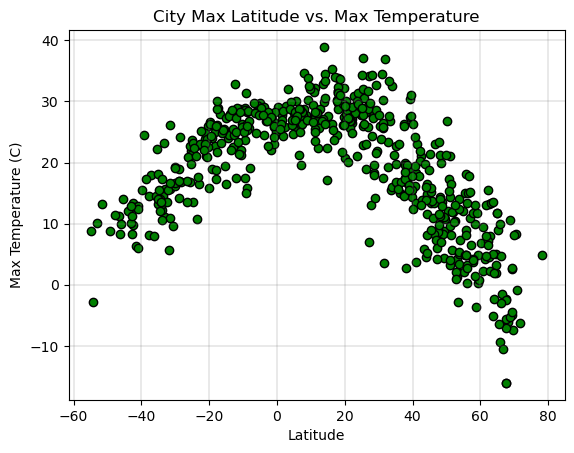

In [46]:

# Build scatter plot for latitude vs. temperature
lat_temp_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
                               edgecolors="black", facecolors="Green")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(axis="both", color="gray", linewidth=0.25, linestyle="-")

# Create the directory if it doesn't exist
output_dir = "../python-api-challenge/output_data"
os.makedirs(output_dir, exist_ok=True)

# Save the figure
plt.savefig(f"{output_dir}/Lat_Temp_ScatterPlot.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

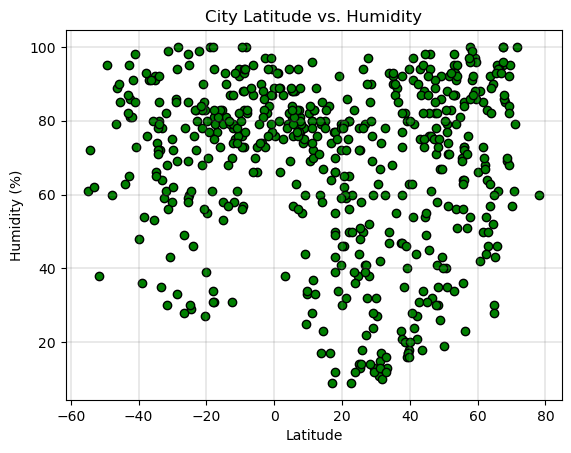

In [47]:
# Build the scatter plots for latitude vs. humidity
at_humidity_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black", facecolors = "Green")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")  
plt.grid (axis = "both", color = "gray", linewidth = 0.25, linestyle = "-")

# Save the figure
plt.savefig("../python-api-challenge/output_data/Lat_Humidity_ScatterPlot.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

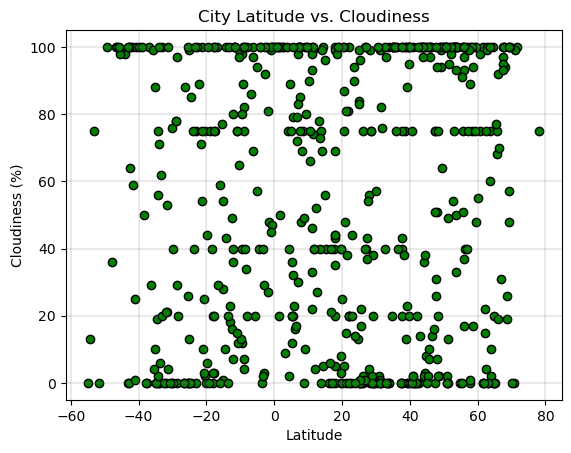

In [48]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloudiness_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black", facecolors = "Green")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")  
plt.grid (axis = "both", color = "gray", linewidth = 0.25, linestyle = "-")

# Save the figure
plt.savefig("../python-api-challenge/output_data/Lat_Cloudiness_ScatterPlot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

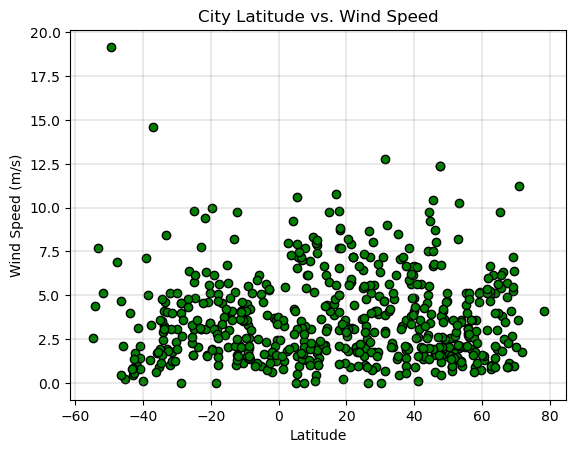

In [49]:
# Build the scatter plots for latitude vs. wind speed
lat_windspeed_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = "black", facecolors = "Green")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")  
plt.grid (axis = "both", color = "gray", linewidth = 0.25, linestyle = "-")

# Save the figure
plt.savefig("../python-api-challenge/output_data/Lat_WindSpeed_ScatterPlot.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    
    #Compute the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    #Compute the regression values
    regress_values = x_values * slope + intercept

    #Format it to display only two decimal places
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    
    #Create the plot
    plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    print(f"The r-squared is: {rvalue**2:.3f}")
    
    plt.show()

    return rvalue

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,27.97,38,4,5.59,US,1746992484
1,bethel,41.3712,-73.4140,23.05,24,0,3.09,US,1746992485
3,bilibino,68.0546,166.4372,-6.11,85,94,1.13,RU,1746992488
6,kapa'a,22.0752,-159.3190,27.18,80,20,7.20,US,1746992491
7,petropavlovsk-kamchatsky,53.0452,158.6483,1.33,87,100,2.00,RU,1746992492


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,27.97,38,4,5.59,US,1746992484
1,bethel,41.3712,-73.4140,23.05,24,0,3.09,US,1746992485
3,bilibino,68.0546,166.4372,-6.11,85,94,1.13,RU,1746992488
6,kapa'a,22.0752,-159.3190,27.18,80,20,7.20,US,1746992491
7,petropavlovsk-kamchatsky,53.0452,158.6483,1.33,87,100,2.00,RU,1746992492


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.702


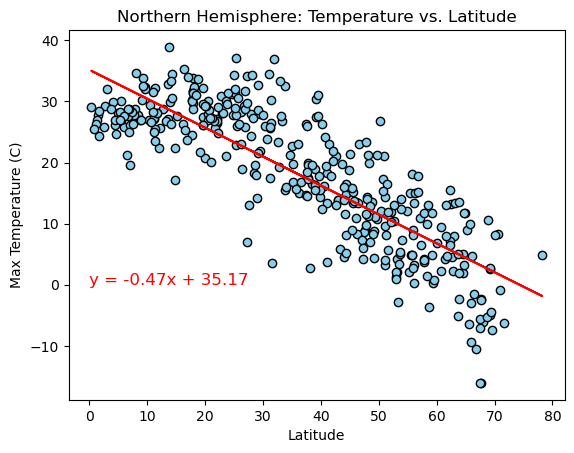

In [54]:
r_squared_north = linear_regression(
    northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"],
    "Latitude", "Max Temperature (C)",
    "Northern Hemisphere: Temperature vs. Latitude", (0, 0)
)

# Print the correct R-squared value
# print(f"R-squared value: {r_squared_north:.3f}")

The r-squared is: 0.702


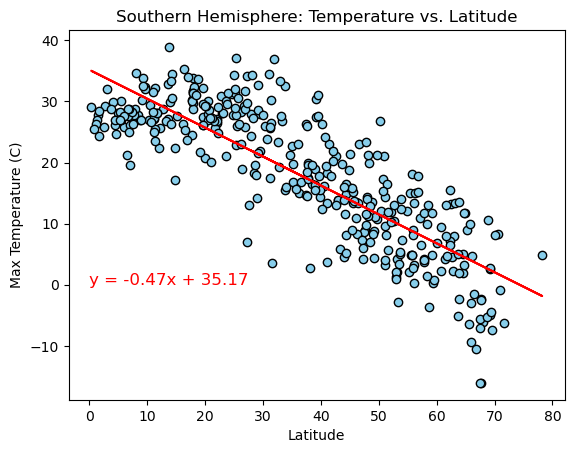

In [55]:
# Linear regression on Southern Hemisphere
r_squared_south = linear_regression(
    southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"],
    "Latitude", "Max Temperature (C)",
    "Southern Hemisphere: Temperature vs. Latitude", (0, 0)
)

# Print the correct R-squared value
# print(f"R-squared value: {r_squared_south:.3f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.010


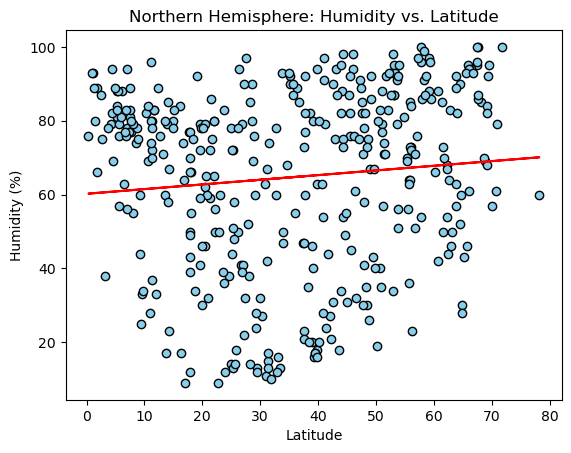

In [56]:
# Northern Hemisphere
r_squared_north = linear_regression(
    northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"],
    "Latitude", "Humidity (%)",
    "Northern Hemisphere: Humidity vs. Latitude", (0, 0)
)

# Print the correct R-squared value
# print(f"R-squared value: {r_squared_north:.3f}")

The r-squared is: 0.010


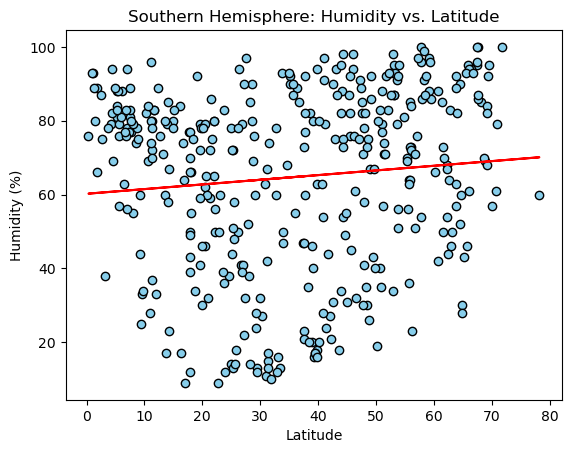

In [57]:
# Southern Hemisphere
r_squared_south = linear_regression(
    southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"],
    "Latitude", "Humidity (%)",
    "Southern Hemisphere: Humidity vs. Latitude", (0, 0)
)
# Print the correct R-squared value
# print(f"R-squared value: {r_squared_south:.3f}")

**Discussion about the linear relationship:** In the case of the linear relationship between latitude and humidity, the relationship is weak. This is further confirmed by the low R-squared value. Upon further analysis, I found umidity is highly dependent on local climate conditions rather than latitude. High latitude areas such as the Artic can have high humidity due to cloud cover just like places in the Equator whose warm air holds more moistuere. Coincidentially, albeit being close to the Equator, deserts can have very low humidity, further supporting this hypothesis. In conclusion, latitude alone is not a strong predictor of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.003


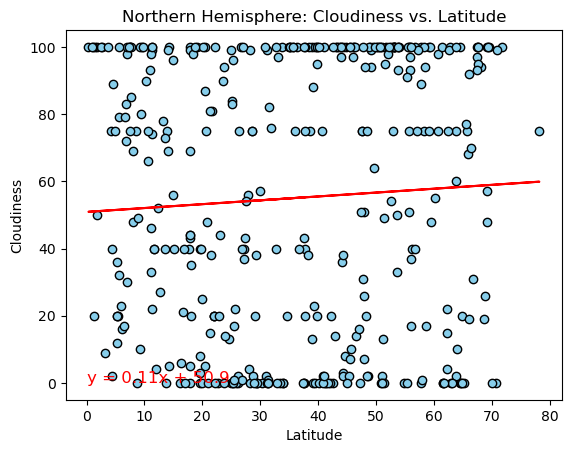

In [58]:
# Northern Hemisphere
r_squared_north = linear_regression(
    northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"],
    "Latitude", "Cloudiness",
    "Northern Hemisphere: Cloudiness vs. Latitude", (0, 0)
)
# Print the correct R-squared value
# print(f"R-squared value: {r_squared_north:.3f}")

The r-squared is: 0.003


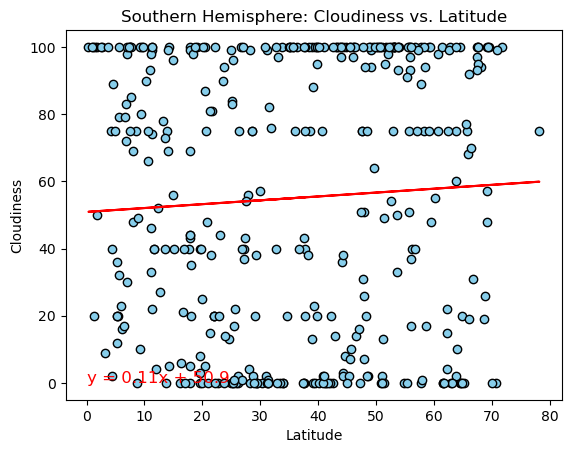

In [59]:
# Southern Hemisphere
r_squared_south = linear_regression(
    southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"],
    "Latitude", "Cloudiness",
    "Southern Hemisphere: Cloudiness vs. Latitude", (0, 0)
)
# Print the correct R-squared value
# print(f"R-squared value: {r_squared_south:.3f}"

**Discussion about the linear relationship:** When it comes to the relationship between cloudiness and latitude, it also weak. This is further supported by its low R-squared value and the lack of a clear pattern in the scater plot. Upon further research, I found cloud formation is heavily influenced by local factors such as geography, air pressure and seasonal weather patterns. In conclusion, latitude is an inconsistent predictor of cloudiness in regions across the world.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.006


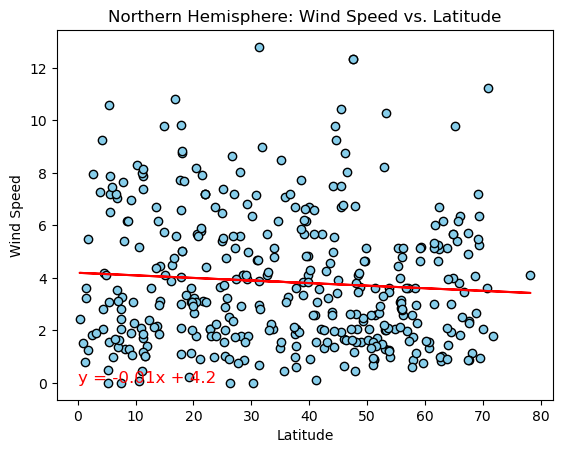

In [60]:
# Northern Hemisphere
r_squared_north = linear_regression(
    northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"],
    "Latitude", "Wind Speed",
    "Northern Hemisphere: Wind Speed vs. Latitude", (0, 0)
)
# Print the correct R-squared value
# print(f"R-squared value: {r_squared_north:.3f}")

The r-squared is: 0.006


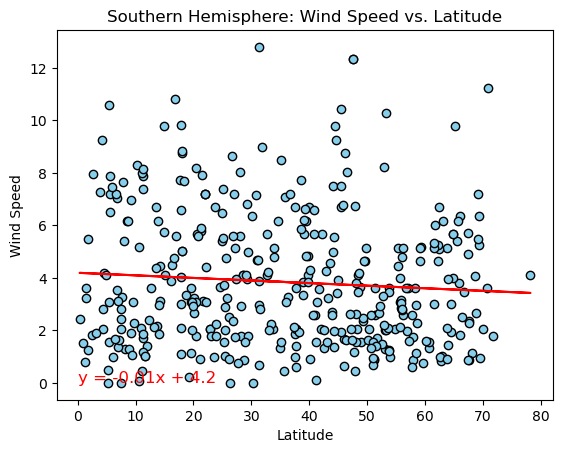

R-squared value: -0.077


In [61]:
# Southern Hemisphere
r_squared_south = linear_regression(
    southern_hemisphere_df["Lat"], 
    southern_hemisphere_df["Wind Speed"],  
    "Latitude", "Wind Speed",
    "Southern Hemisphere: Wind Speed vs. Latitude", (0, 0)
)
# Print the correct R-squared value
print(f"R-squared value: {r_squared_south:.3f}")

**Discussion about the linear relationship:** Latitude alone is not a strong predictor of wind speed but the relationship tends to be a little stronger. Wind speed tends to be driven by air pressure differences as well as local geography. While a low to moderate relationship is shown, regional trends influenced by wind patterns are a stronger predictor than latitude alone. 